<a href="https://colab.research.google.com/github/puckybreg/625.722-Markov-Decision-Process-Project/blob/main/Bee_%26_Flower_Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pymdptoolbox
!pip install cvxopt

  Created wheel for pymdptoolbox: filename=pymdptoolbox-4.0b3-py3-none-any.whl size=25656 sha256=bb8db6e55e2c6fda18fa6e29074c5e32c46915c5fa33e240c3254b88d51fe6c2
  Stored in directory: /root/.cache/pip/wheels/09/a8/27/a76d688633fa5d71984c288499c2170a8d06726135b8e216fd
Successfully built pymdptoolbox


In [3]:
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from skimage import data, io, filters
import mdptoolbox.example
import pandas as pd
from random import seed
from random import random


In [4]:
# Example mdptoolbox code
P, R = mdptoolbox.example.forest(10, 2, 20)
vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
vi.run()
vi.policy # result is (0, 0, 0)
print(vi.policy)
print(R)
P


(0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
[[ 0.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 2. 20.]]


array([[[0.1, 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0.9, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0.9, 0. , 0. , 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. , 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9, 0. ],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9],
        [0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9]],

       [[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. , 0. ,

In [ ]:
M = np.random.rand(7, 20).round()
M

array([[1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
        0., 0., 1., 0.],
       [1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
        1., 1., 1., 1.],
       [1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
        0., 1., 1., 0.],
       [1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
        0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
        0., 0., 0., 1.],
       [1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
        1., 0., 0., 1.],
       [0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
        1., 0., 1., 0.]])

In [5]:
# Example MDPToolbox from R sample

# Generate the species richness matrix
# M <- round(matrix(nrow=7, ncol=20,data=runif(7*20,0,1)))
# M
M = np.random.rand(7, 20).round()
M
# Generate the transition and reward matrix
# Cannot find this function documented online and need to find the equivalent still in python
# PR <- mdp_example_reserve(M, 0.2)
# P <- PR$P
# R <- PR$R
P, R = mdptoolbox.example.forest(10, 2, 20)
print(P)
print(R)
# Checks the validity of the MDP
# This check happens automatically in most function calls from the MDP python library
# mdp_check(P, R)
print(mdptoolbox.util.check(P, R))

# Solve the reserve design problem
# results <- mdp_value_iteration(P, R, 0.96, 0.001);
# policy <- results$policy
vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
vi.run()
vi.policy

# Explore solution with initial state all sites available
# Not in docs either
# explore_solution_reserve(numeric(7), policy, M, P, R)

[[[0.1 0.9 0.  0.  0.  0.  0.  0.  0.  0. ]
  [0.1 0.  0.9 0.  0.  0.  0.  0.  0.  0. ]
  [0.1 0.  0.  0.9 0.  0.  0.  0.  0.  0. ]
  [0.1 0.  0.  0.  0.9 0.  0.  0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.9 0.  0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.9 0.  0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.9 0.  0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.9 0. ]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.9]
  [0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.9]]

 [[1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]]
[[ 0.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 2. 20.]]
None


(0, 0, 0, 0, 0, 0, 0, 0, 0, 1)

In [12]:
# TODO: Try to model the simple examples from the textbook
P = np.array([[[0.99, 0.01],
              [0.01, 0.99]],
              [[0.99, 0.01],
              [1, 0.0]]])
R = np.array([[0, 1], [0,50]])

mdptoolbox.util.check(P, R)
vi = mdptoolbox.mdp.ValueIteration(P, R, 0.9)
vi.run()
vi.policy

(1, 1)

[[0.2 0.7 0.1]]
[[0.69 0.22 0.09]]
[[0.354 0.555 0.091]]
[[0.5885 0.3206 0.0909]]
[[0.42442 0.48467 0.09091]]
[[0.539269 0.369822 0.090909]]
[[0.4588754 0.4502155 0.0909091]]
[[0.51515085 0.39394006 0.09090909]]
[[0.47575804 0.43333287 0.09090909]]
[[0.50333301 0.4057579  0.09090909]]
[[0.48403053 0.42506038 0.09090909]]
[[0.49754226 0.41154864 0.09090909]]
[[0.48808405 0.42100686 0.09090909]]
[[0.4947048  0.41438611 0.09090909]]
[[0.49007028 0.41902063 0.09090909]]
[[0.49331444 0.41577647 0.09090909]]
[[0.49104353 0.41804738 0.09090909]]
[[0.49263317 0.41645774 0.09090909]]
[[0.49152042 0.41757049 0.09090909]]
[[0.49229934 0.41679157 0.09090909]]
[[0.4917541  0.41733681 0.09090909]]
[[0.49213577 0.41695514 0.09090909]]
[[0.4918686  0.41722231 0.09090909]]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

[[0.49205562 0.41703529 0.09090909]]
[[0.4919247  0.41716621 0.09090909]]
[[0.49201634 0.41707457 0.09090909]]
[[0.4919522  0.41713871 0.09090909]]
[[0.4919971  0.41709381 0.09090909]]
[[0.49196567 0.41712524 0.09090909]]
[[0.49198767 0.41710324 0.09090909]]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

[[0.49197227 0.41711864 0.09090909]]
[[0.49198305 0.41710786 0.09090909]]
[[0.4919755  0.41711541 0.09090909]]
[[0.49198078 0.41711012 0.09090909]]
[[0.49197709 0.41711382 0.09090909]]
[[0.49197968 0.41711123 0.09090909]]
[[0.49197786 0.41711305 0.09090909]]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

[[0.49197913 0.41711178 0.09090909]]
[[0.49197824 0.41711267 0.09090909]]
[[0.49197887 0.41711204 0.09090909]]
[[0.49197843 0.41711248 0.09090909]]
[[0.49197874 0.41711217 0.09090909]]
[[0.49197852 0.41711239 0.09090909]]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

[[0.49197867 0.41711224 0.09090909]]
[[0.49197857 0.41711234 0.09090909]]
[[0.49197864 0.41711227 0.09090909]]
[[0.49197859 0.41711232 0.09090909]]
[[0.49197862 0.41711228 0.09090909]]
[[0.4919786  0.41711231 0.09090909]]


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

[[0.49197862 0.41711229 0.09090909]]


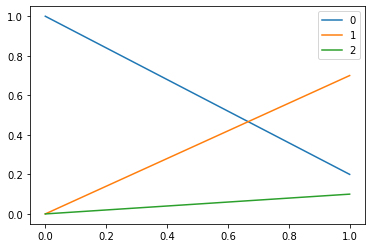

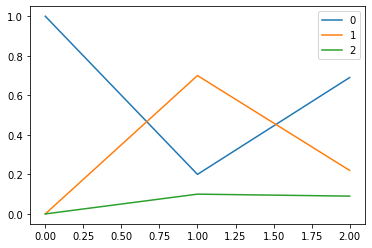

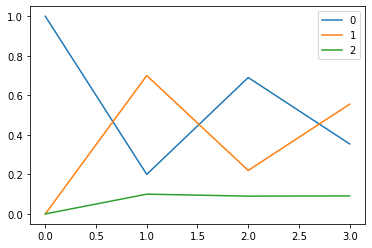

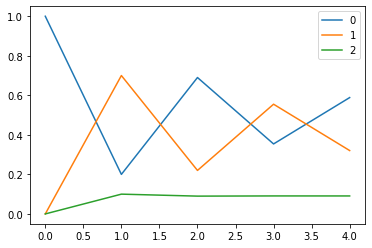

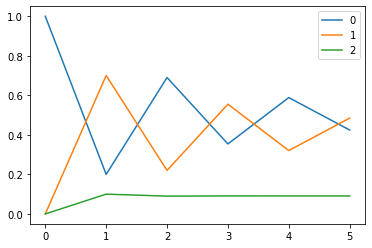

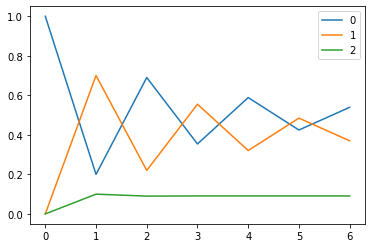

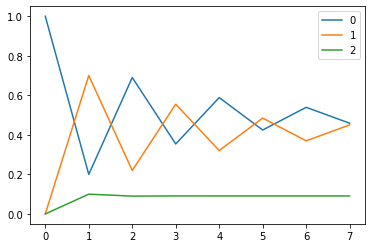

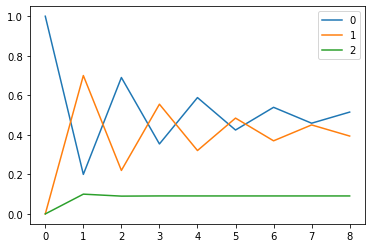

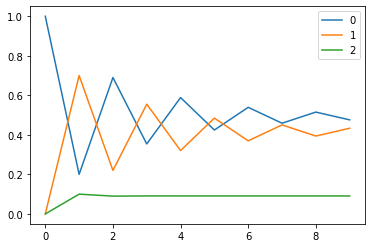

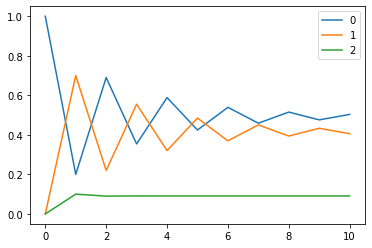

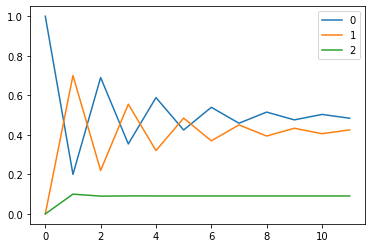

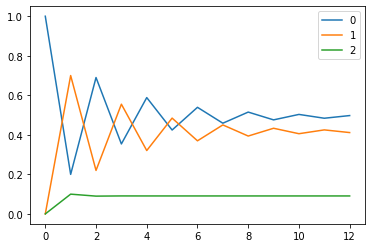

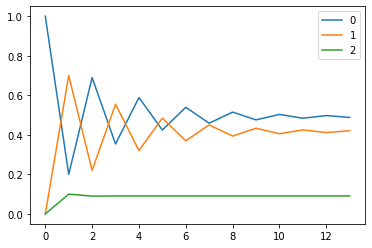

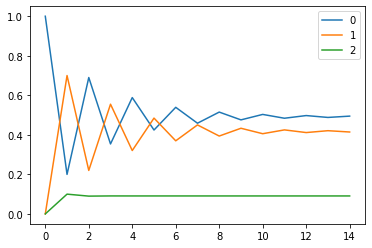

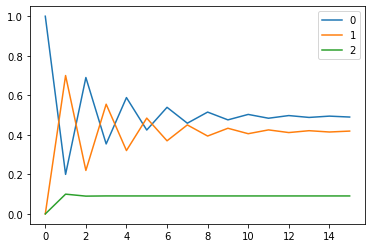

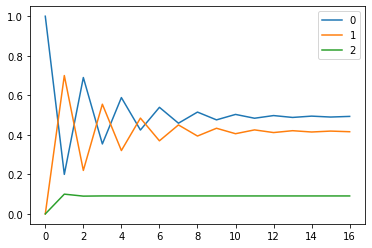

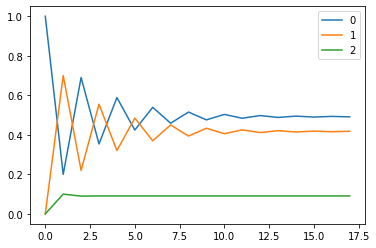

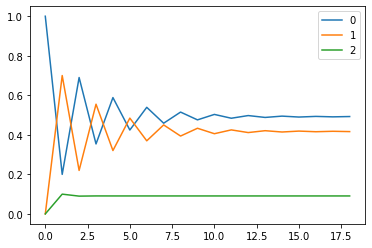

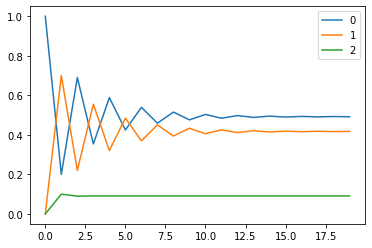

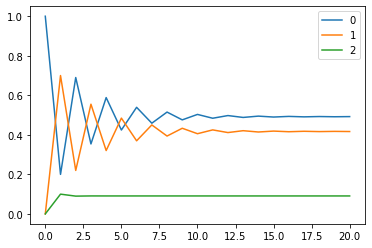

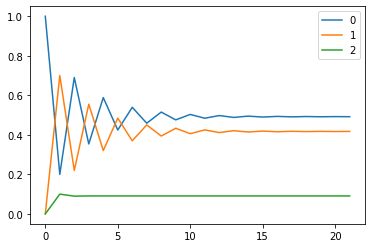

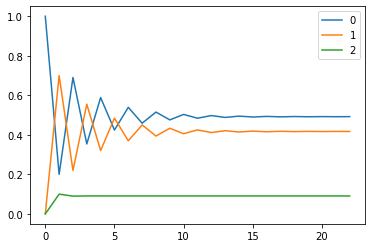

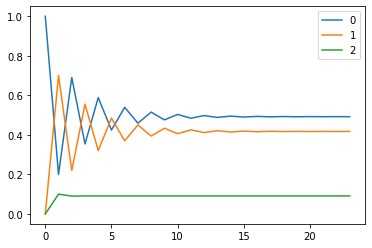

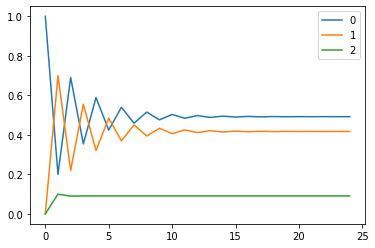

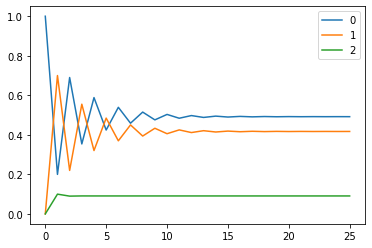

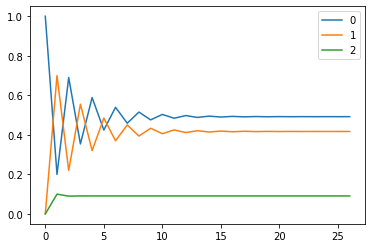

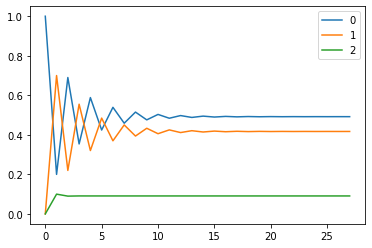

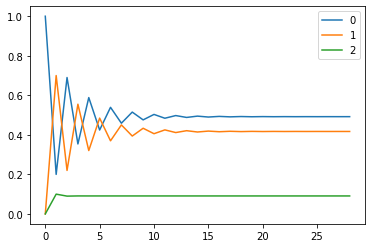

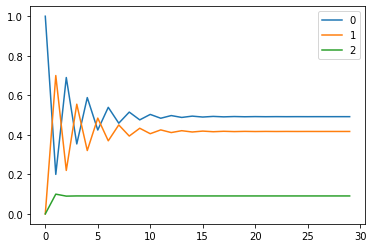

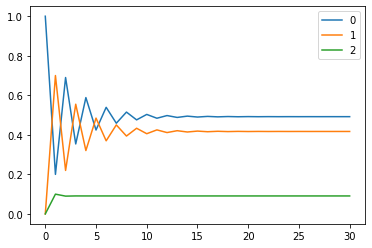

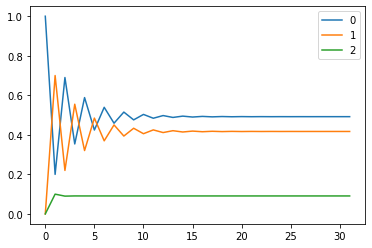

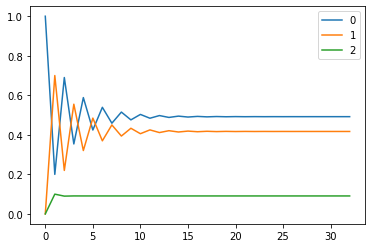

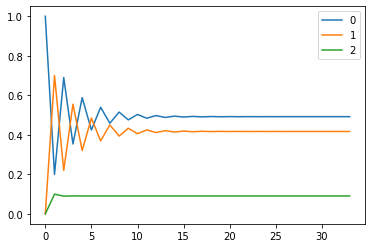

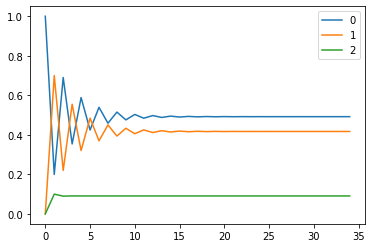

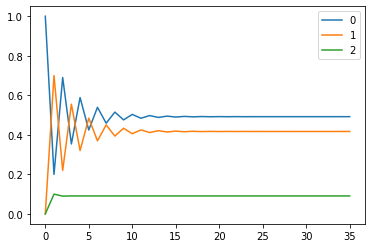

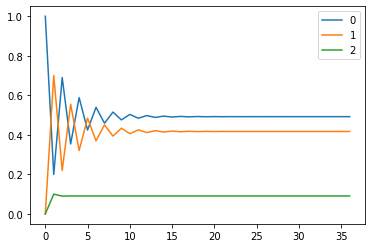

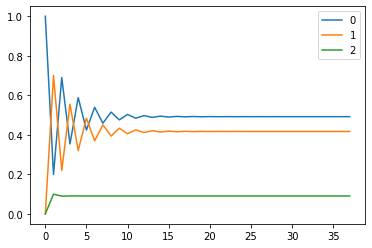

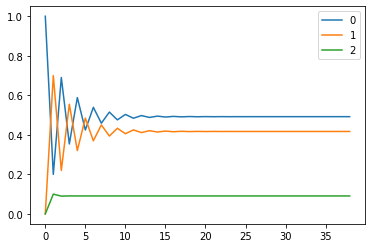

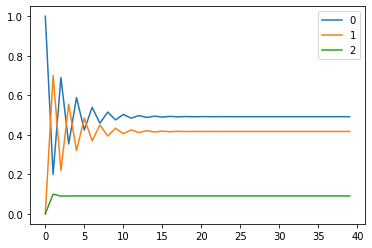

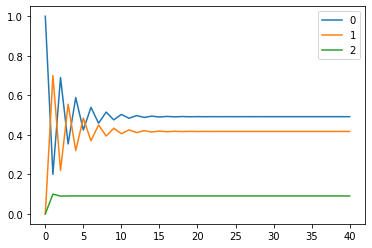

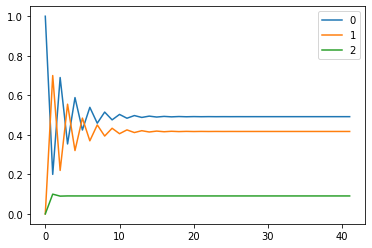

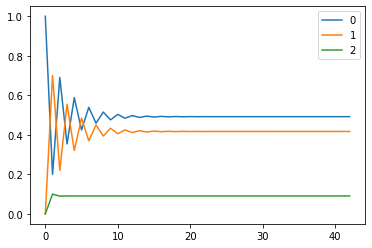

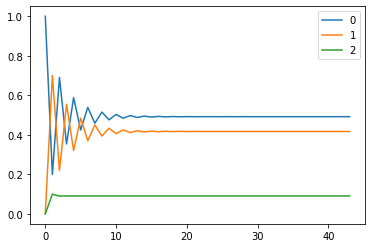

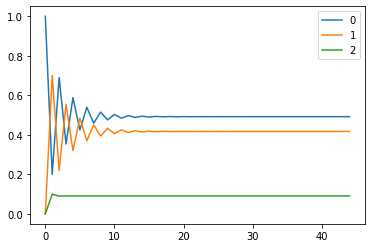

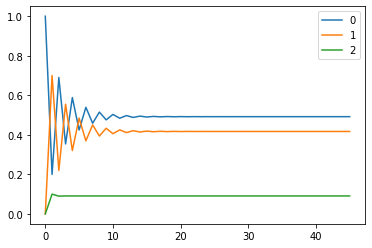

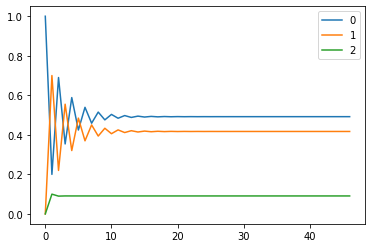

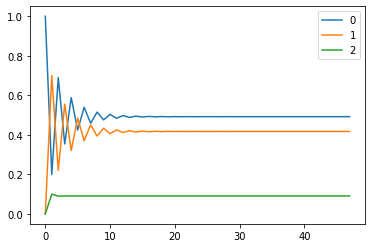

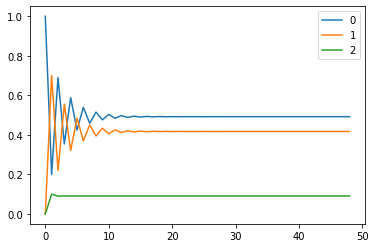

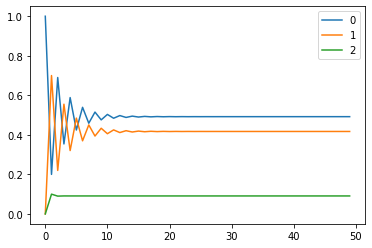

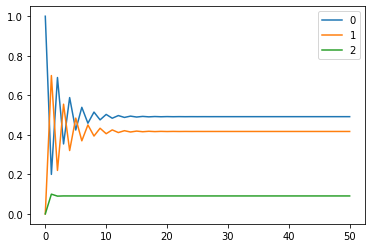

In [ ]:
# Markov Chain, finding the steady state

P = np.array([[0.2, 0.7, 0.1],
              [0.9, 0.0, 0.1],
              [0.2, 0.8, 0.0]])
state=np.array([[1.0, 0.0, 0.0]])
stateHist=state
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0]]
for x in range(50):
  state=np.dot(state,P)
  print(state)
  stateHist=np.append(stateHist,state,axis=0)
  dfDistrHist = pd.DataFrame(stateHist)
  dfDistrHist.plot()
plt.show()

Psuedo Code:
For images in folder:
    Crop images to pre-determined size in order to capture just one flower
Take those newly cropped images and produce and save a gif of them

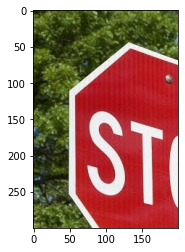

In [ ]:
# Opening image
img = Image.open("/content/image28StopSign.jpeg")
image_array = np.array(img)
cropped_image_array = image_array[0:300, 100:300]


# Convert array to image
cropped_image = Image.fromarray(cropped_image_array)
  

# Creates the environment 
# of the picture and shows it
plt.subplot(1, 1, 1)
plt.imshow(cropped_image)
plt.show()

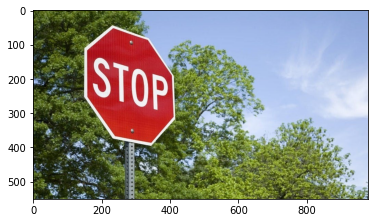

In [ ]:

# Opening image
img = cv2.imread("/content/image28StopSign.jpeg")
  
# OpenCV opens images as BRG 
# but we want it as RGB and 
# we also need a grayscale 
# version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
# Creates the environment 
# of the picture and shows it
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

In [ ]:
# Opening image
img = cv2.imread("/content/image28StopSign.jpeg")

  
# OpenCV opens images as BRG 
# but we want it as RGB We'll 
# also need a grayscale version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


  
# Use minSize because for not 
# bothering with extra-small 
# dots that would look like STOP signs
stop_data = cv2.CascadeClassifier('stop_data.xml')
# minSize = (20, 20)
found = stop_data.detectMultiScale(img_gray, minSize =(20, 20))
  
# Don't do anything if there's 
# no sign
amount_found = len(found)
  
if amount_found != 0:
      
    # There may be more than one
    # sign in the image
    for (x, y, width, height) in found:
          
        # We draw a green rectangle around
        # every recognized sign
        cv2.rectangle(img_rgb, (x, y), 
                      (x + height, y + width), 
                      (0, 255, 0), 5)
          
# Creates the environment of 
# the picture and shows it
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

error: ignored